## Normality Tests

### Benchmark Case

In [1015]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl, plt

### Real World Data

In [1016]:
import pandas as pd
import yfinance as yf

In [1017]:
# input
symbols = ['TSLA','RIOT','FCEL','KNDI', 'JMIA']
start = '2020-01-01'
end = '2020-11-26'

# Read data 
data = yf.download(symbols,start,end)['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [1018]:
data.head()

,FCEL,JMIA,KNDI,RIOT,TSLA
Date,,,,,
2020-01-02,2.01,6.60,4.85,1.22,86.052002
2020-01-03,2.06,6.51,4.81,1.18,88.601997
2020-01-06,2.22,6.40,4.81,1.30,90.307999
2020-01-07,2.08,6.31,4.71,1.49,93.811996
2020-01-08,2.29,6.25,4.65,1.37,98.428001


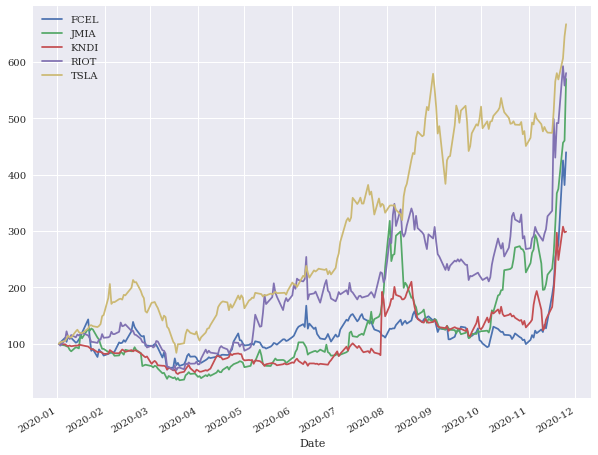

In [1019]:
(data / data.iloc[0] * 100).plot(figsize=(10, 8))

In [1020]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,FCEL,JMIA,KNDI,RIOT,TSLA
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.024571,-0.013730,-0.008282,-0.033336,0.029203
2020-01-06,0.074801,-0.017041,0.000000,0.096850,0.019072
2020-01-07,-0.065139,-0.014162,-0.021009,0.136412,0.038067
2020-01-08,0.096184,-0.009554,-0.012821,-0.083965,0.048033


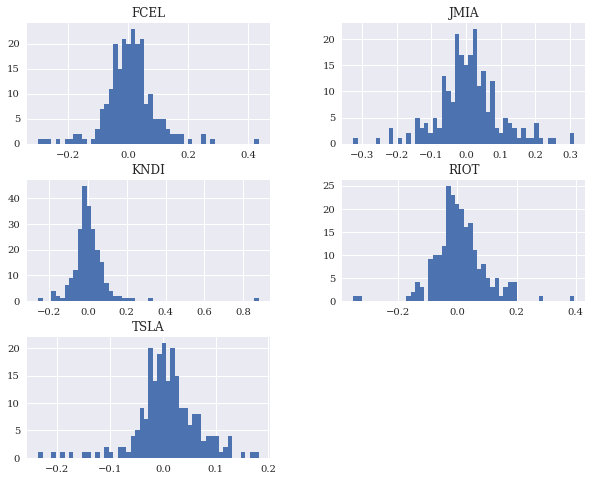

In [1021]:
log_returns.hist(bins=50, figsize=(10, 8));

In [1022]:
for sym in symbols:
    print('\nResults for symbol {}'.format(sym))
    print(30 * '-')
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)  


Results for symbol TSLA
------------------------------
     statistic           value
------------------------------
          size       228.00000
           min        -0.23652
           max         0.18145
          mean         0.00832
           std         0.05822
          skew        -0.53814
      kurtosis         2.66603

Results for symbol RIOT
------------------------------
     statistic           value
------------------------------
          size       228.00000
           min        -0.35208
           max         0.39484
          mean         0.00771
           std         0.08414
          skew         0.19397
      kurtosis         3.74519

Results for symbol FCEL
------------------------------
     statistic           value
------------------------------
          size       228.00000
           min        -0.29908
           max         0.43394
          mean         0.00650
           std         0.08615
          skew         0.25343
      kurtosis         4.0

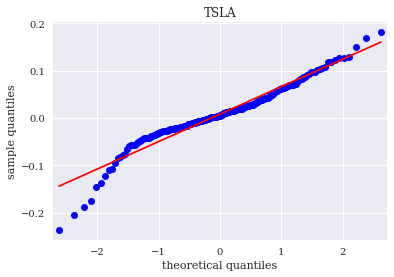

In [1023]:
sm.qqplot(log_returns['TSLA'].dropna(), line='s')
plt.title('TSLA')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

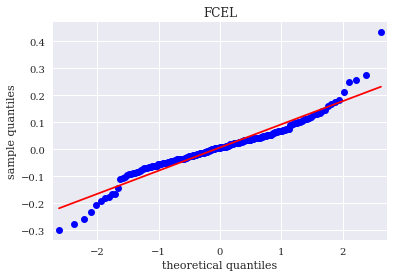

In [1024]:
sm.qqplot(log_returns['FCEL'].dropna(), line='s')
plt.title('FCEL')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

In [1025]:
for sym in symbols:
    print('\nResults for symbol {}'.format(sym))
    print(32 * '-')
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)  


Results for symbol TSLA
--------------------------------
Skew of data set          -0.538
Skew test p-value          0.001
Kurt of data set           2.666
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol RIOT
--------------------------------
Skew of data set           0.194
Skew test p-value          0.222
Kurt of data set           3.745
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol FCEL
--------------------------------
Skew of data set           0.253
Skew test p-value          0.112
Kurt of data set           4.037
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol KNDI
--------------------------------
Skew of data set           3.988
Skew test p-value          0.000
Kurt of data set          36.386
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol JMIA
--------------------------------
Skew of data set           0.121
Skew test p-value

## Portfolio Optimization

### The Data

In [1026]:
noa = len(symbols)  

In [1027]:
rets = np.log(data / data.shift(1))

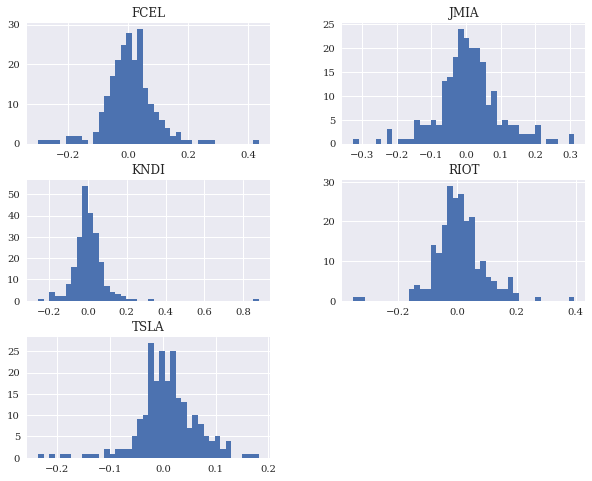

In [1028]:
rets.hist(bins=40, figsize=(10, 8));
# plt.savefig('../../images/ch13/stat_11.png')

In [1029]:
rets.mean() * 252  

FCEL    1.637063
JMIA    1.923379
KNDI    1.210451
RIOT    1.943520
TSLA    2.097433
dtype: float64

In [1030]:
rets.cov() * 252  

,FCEL,JMIA,KNDI,RIOT,TSLA
FCEL,1.870322,0.742765,0.536735,0.749613,0.477278
JMIA,0.742765,2.071975,0.690053,0.603832,0.312002
KNDI,0.536735,0.690053,2.100154,0.400481,0.352170
RIOT,0.749613,0.603832,0.400481,1.784118,0.414091
TSLA,0.477278,0.312002,0.352170,0.414091,0.854118


### The Basic Theory

In [1031]:
weights = np.random.random(noa)  
weights /= np.sum(weights)  

In [1032]:
weights

array([0.28073749, 0.1441125 , 0.11323137, 0.16055028, 0.30136837])

In [1033]:
weights.sum()

1.0

In [1034]:
np.sum(rets.mean() * weights) * 252  

1.81796167004127

In [1035]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))  

0.7397173662397147

In [1036]:
math.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))  

0.8600682334790157

In [1037]:
def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252

In [1038]:
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

In [1039]:
prets = []
pvols = []
for p in range (2500):  
    weights = np.random.random(noa)  
    weights /= np.sum(weights)  
    prets.append(port_ret(weights))  
    pvols.append(port_vol(weights))  
prets = np.array(prets)
pvols = np.array(pvols)

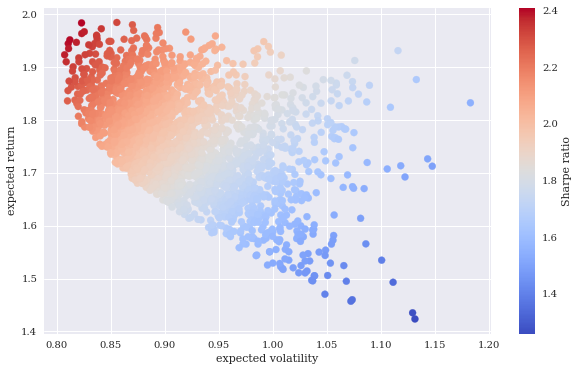

In [1040]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');
# plt.savefig('../../images/ch13/stat_12.png')

### Portfolio Optimizations

In [1041]:
import scipy.optimize as sco

In [1042]:
def min_func_sharpe(weights):  
    return -port_ret(weights) / port_vol(weights)  

In [1043]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  

In [1044]:
bnds = tuple((0, 1) for x in range(noa))  

In [1045]:
eweights = np.array(noa * [1. / noa,])  
eweights  

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [1046]:
min_func_sharpe(eweights)

-2.0089946589676924

In [1047]:
%%time
opts = sco.minimize(min_func_sharpe, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)  

CPU times: user 91.1 ms, sys: 4.51 ms, total: 95.6 ms
Wall time: 97.7 ms


In [1048]:
opts  

     fun: -2.4755536639740834
     jac: array([ 5.24206758e-02, -9.71257687e-05,  3.71574163e-02, -1.01000071e-04,
        4.47928905e-05])
 message: 'Optimization terminated successfully.'
    nfev: 50
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([1.62916304e-17, 1.62917413e-01, 1.30522309e-17, 1.48816172e-01,
       6.88266416e-01])

In [1049]:
opts['x'].round(3)  

array([0.   , 0.163, 0.   , 0.149, 0.688])

In [1050]:
port_ret(opts['x']).round(3)  

2.046

In [1051]:
port_vol(opts['x']).round(3)  

0.827

In [1052]:
port_ret(opts['x']) / port_vol(opts['x'])  

2.4755536639740834

In [1053]:
optv = sco.minimize(port_vol, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)  

In [1054]:
optv

     fun: 0.8001429540098712
     jac: array([0.80110473, 0.79941438, 0.8002928 , 0.80064198, 0.80003602])
 message: 'Optimization terminated successfully.'
    nfev: 37
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.06196211, 0.12087475, 0.13115878, 0.13449909, 0.55150527])

In [1055]:
optv['x'].round(3)

array([0.062, 0.121, 0.131, 0.134, 0.552])

In [1056]:
port_vol(optv['x']).round(3)

0.8

In [1057]:
port_ret(optv['x']).round(3)

1.911

In [1058]:
port_ret(optv['x']) / port_vol(optv['x'])

2.3881136070090627

### Efficient Frontier

In [1059]:
cons = ({'type': 'eq', 'fun': lambda x:  port_ret(x) - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  

In [1060]:
bnds = tuple((0, 1) for x in weights)

In [1061]:
%%time
trets = np.linspace(0.05, 0.2, 50)
tvols = []
for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP',
                       bounds=bnds, constraints=cons)  
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: user 22 s, sys: 44.6 ms, total: 22.1 s
Wall time: 22.1 s


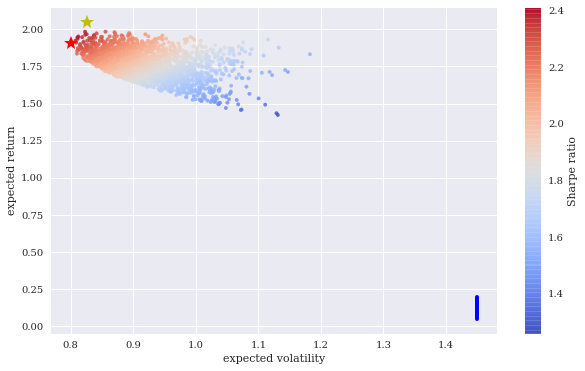

In [1062]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)
plt.plot(port_vol(opts['x']), port_ret(opts['x']),
         'y*', markersize=15.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']),
         'r*', markersize=15.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
# plt.savefig('../../images/ch13/stat_13.png')

### Capital Market Line

In [1063]:
import scipy.interpolate as sci

In [1064]:
ind = np.argmin(tvols)  
evols = tvols[ind:]  
erets = trets[ind:]  

In [1065]:
tck = sci.splrep(evols, erets)  

ValueError: Error on input data

In [ ]:
def f(x):
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)
def df(x):
    ''' First derivative of efficient frontier function. '''
    return sci.splev(x, tck, der=1)

In [ ]:
def equations(p, rf=0.01):
    eq1 = rf - p[0]  
    eq2 = rf + p[1] * p[2] - f(p[2])  
    eq3 = p[1] - df(p[2])  
    return eq1, eq2, eq3

In [ ]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])  

In [ ]:
opt  

In [ ]:
np.round(equations(opt), 6)  

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=(prets - 0.01) / pvols,
            marker='.', cmap='coolwarm')
plt.plot(evols, erets, 'b', lw=4.0)
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, 'r', lw=1.5)
plt.plot(opt[2], f(opt[2]), 'y*', markersize=15.0) 
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
# plt.savefig('../../images/ch13/stat_14.png')

In [ ]:
cons = ({'type': 'eq', 'fun': lambda x:  port_ret(x) - f(opt[2])},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  
res = sco.minimize(port_vol, eweights, method='SLSQP',
                   bounds=bnds, constraints=cons)

In [ ]:
res['x'].round(3)  

In [ ]:
port_ret(res['x'])

In [ ]:
port_vol(res['x'])

In [ ]:
port_ret(res['x']) / port_vol(res['x'])